# Homework 2

## Task 1: Apartment prices

In [ ]:
library(tidyverse)
library(ggplot2)
df1 <- read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/Booli_sold.csv")

## 1.a) 

We calculate the price per square meter (ppsqm) for each apartment sold and add it to our dataframe as the first column/variable.

In [ ]:
df1_ppsqm <- df1|>
    mutate(
        ppsqm = soldPrice/livingArea,
        .before = 1
    )
df1_ppsqm

## 1.b)

We find the five most expensive apartments with respect to price per square meter (ppsqm) and present this using a table. 

In [3]:
five_most_exp <- df1_ppsqm|>
    slice_max(ppsqm,n=5)
five_most_exp

ppsqm,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,⋯,location.position.latitude,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<chr>,<dbl>,<date>,⋯,<dbl>,<dbl>,<lgl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
104166.67,1595000,1464,24.0,1,2016-01-07 14:51:06,1935,Lägenhet,2018259,2016-01-21,⋯,59.37178,18.05527,NA,Stockholm,Stockholms län,161,Notar,1566,Broker,http://www.notar.se/
102083.33,1890000,1464,24.0,1,2016-06-11 08:55:51,1935,Lägenhet,2125576,2016-06-21,⋯,59.37178,18.05527,NA,Stockholm,Stockholms län,161,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/
100000.00,1795000,1374,23.0,1,2016-04-15 19:10:49,1935,Lägenhet,2078171,2016-04-28,⋯,59.37197,18.05542,TRUE,Stockholm,Stockholms län,135,Notar,1566,Broker,http://www.notar.se/
88400.00,1750000,1144,25.0,1,2017-05-18 16:20:57,1936,Lägenhet,2330886,2017-06-01,⋯,59.37148,18.05388,NA,Stockholm,Stockholms län,218,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/
85501.86,1895000,1522,26.9,1,2016-04-01 22:56:37,1968,Lägenhet,2067384,2016-04-19,⋯,59.37056,18.05853,TRUE,Stockholm,Stockholms län,298,Notar,1566,Broker,http://www.notar.se/


## 1.c)

We calculate the average ppsqm in "Ekhagen":

In [4]:
avg_price <- mean(df1_ppsqm$ppsqm,na.rm=TRUE)
avg_price

[1] 58759.38

## 1.d)


Something I find interesting is that there is a somewhat muddy relationsship between the price an apartment was sold for and the price per square meter. Figure 1 below shows a scatterplot of Sold price vs Price per average square meter. Before looking at the data one could suspect that there should be a trend that says that (a) very expensive apartments have very high price per square meter and (b) the apartments with the highest price per square meter are not very expensive. This would be intuitive. An apartment that is unusually expensive is probably expensive in either the sense that it is very large (so many square meters) or has a very high price per square meter. This would explain (a). However if one considers an apartment with a very high price per square meter one might then be tempted to conclude that it is going to be expensive. However this need not be the case. The difference in price between an apartment of say $20$ sqm and $25$ sqm is likely going to be very large, whereas a difference in price between an apartment of say $150$ sqm and $160$ sqm is likely to not be very large. For this reason one could suspect that a lot of the apartments with very high ppsqm are actually going to be very cheap apartments (because the reason the ppsqm is high is because the floor area is small) which would explain (b). This would show a kind of quadratic relationsship between price and ppsqm, which is what Figure 1 seems to support.  

Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_point()`)."


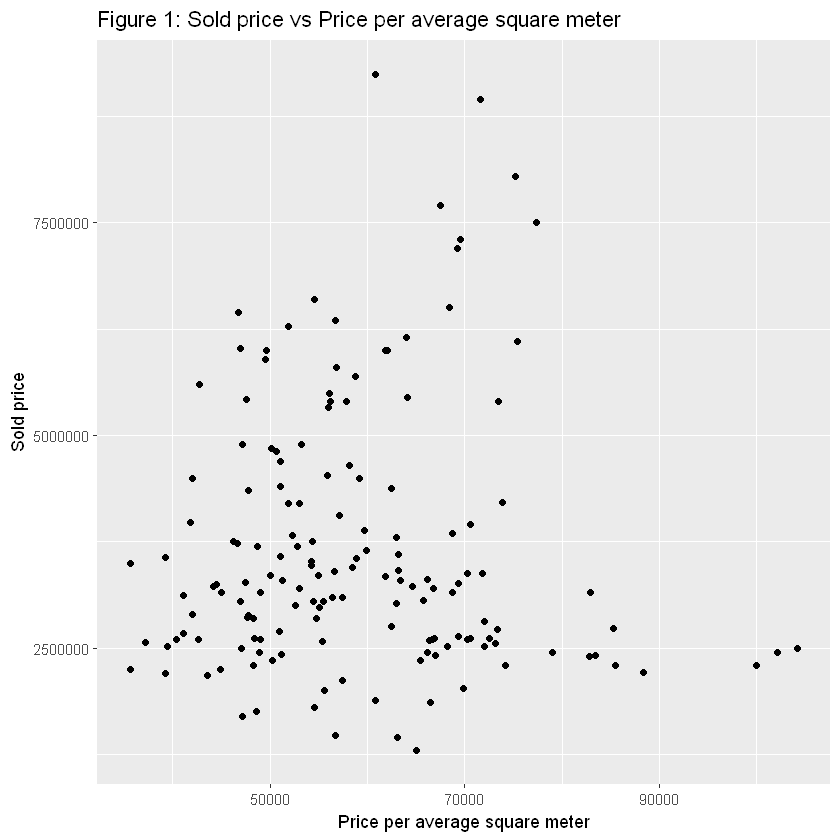

In [5]:
ggplot(df1_ppsqm, aes(x = ppsqm, y = soldPrice)) +
  geom_point() +                    
  labs(title = "Figure 1: Sold price vs Price per average square meter",         
       x = "Price per average square meter",            
       y = "Sold price")    

## Task 2: The swedish election of 2018

In [6]:
df2 <- read.csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/2018_R_per_kommun.csv",sep=";",dec=",")
df2

LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,⋯,TRP,VL.S,ÖVR,OGEJ,BLANK,OG,RÖSTER.GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
1,14,Stockholms län,Upplands Väsby,23.11,6.26,5.66,6.71,26.97,8.01,⋯,NA,NA,NA,0.04,0.69,0.06,25830,26036,30740,84.70
1,15,Stockholms län,Vallentuna,28.29,10.11,7.73,7.58,18.91,4.47,⋯,0,NA,0.00,0.02,0.59,0.08,20952,21099,23438,90.02
1,17,Stockholms län,Österåker,29.68,9.35,7.48,7.13,19.71,4.97,⋯,NA,NA,0.01,0.03,0.69,0.13,27711,27947,31309,89.26
1,20,Stockholms län,Värmdö,27.49,9.76,6.40,5.89,20.48,6.02,⋯,NA,NA,0.01,0.04,0.67,0.07,28115,28335,31371,90.32
1,23,Stockholms län,Järfälla,23.96,6.31,6.04,6.29,27.68,8.75,⋯,0,NA,0.02,0.04,0.53,0.07,45654,45948,53230,86.32
1,25,Stockholms län,Ekerö,28.12,11.24,7.64,7.85,17.17,4.76,⋯,NA,NA,0.01,0.01,0.64,0.08,17814,17946,19472,92.16
1,26,Stockholms län,Huddinge,24.07,7.52,6.14,5.35,26.10,8.63,⋯,NA,NA,0.01,0.04,0.58,0.07,61440,61869,72839,84.94
1,27,Stockholms län,Botkyrka,18.52,5.19,4.39,8.13,32.34,9.85,⋯,NA,NA,0.06,0.03,0.64,0.05,45393,45719,58436,78.24
1,28,Stockholms län,Salem,24.84,7.61,7.58,7.98,23.07,5.98,⋯,NA,NA,NA,0.04,0.75,0.02,9985,10066,11463,87.81


## 2.a)

We calculate the total number of legitimate voters in Stockholm. 

In [7]:
df2_Sthlm <- filter(df2, LÄNSNAMN == 'Stockholms län')
sum(df2_Sthlm$'RÖSTER.GILTIGA', na.rm=TRUE)

[1] 1426237

## 2.b)

We now seek the muncipality in Sweden with the highest support for socialdemokraterna:

In [8]:
df2|>
    slice_max(S,n=1)

LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,⋯,TRP,VL.S,ÖVR,OGEJ,BLANK,OG,RÖSTER.GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
17,62,Värmlands län,Munkfors,8.33,8.12,2.91,3.93,52.18,6.11,⋯,NA,NA,NA,NA,1.02,NA,2340,2364,2777,85.13


## 2.c) 

We now seek the three muncipalities with the highest participation and present it in form of a table:

In [9]:
df2|>
    slice_max(VALDELTAGANDE, n=3)

LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,⋯,TRP,VL.S,ÖVR,OGEJ,BLANK,OG,RÖSTER.GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
12,62,Skåne län,Lomma,33.16,9.33,9.97,6.38,16.69,2.54,⋯,NA,NA,NA,NA,0.51,0.04,16401,16492,17570,93.86
6,43,Jönköpings län,Habo,19.73,8.77,4.22,15.13,23.74,3.91,⋯,NA,NA,NA,0.06,0.88,0.06,7746,7825,8382,93.35
12,33,Skåne län,Vellinge,39.56,7.24,7.26,7.45,10.58,1.31,⋯,0,NA,NA,0.02,0.40,0.04,25245,25360,27231,93.13


## Predicting Strokes

In [ ]:
url3 <- "https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv"
df3 <- read_csv(url3)

I thought that it would be interesting to see if there is any difference in proportions of male/female in stroke/not stroke. To study this I settled for a barplot. 

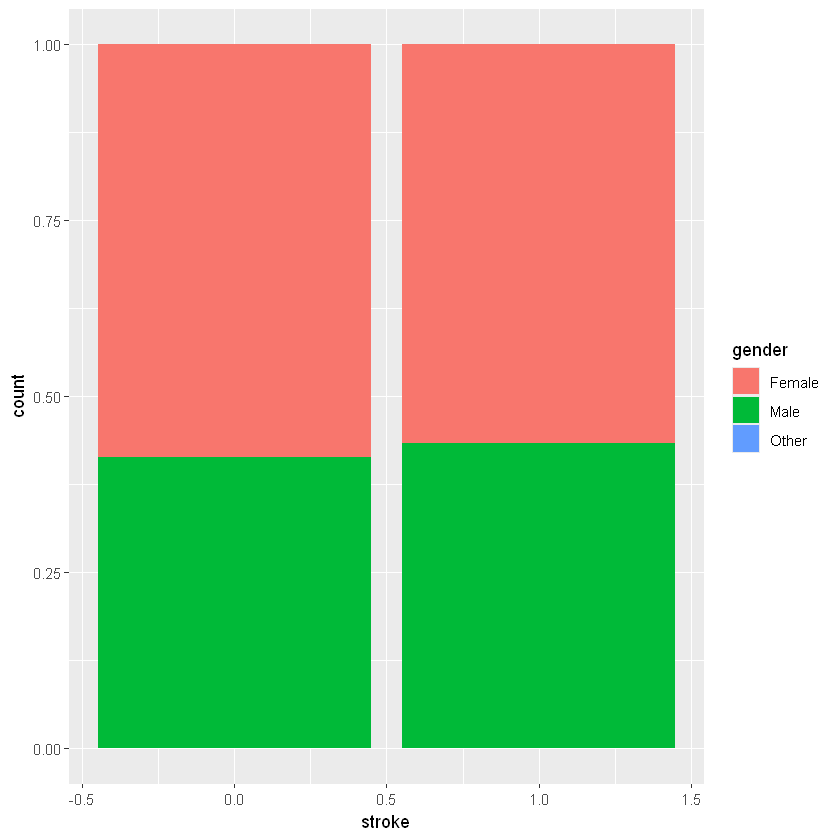

In [11]:
ggplot(df3,aes(x=stroke,fill=gender))+
    geom_bar(position="fill")
    tabs=(title="Figure 2: Differences in male/femlare proportions between stroke/no stroke") 

From Figure 2 we can see that the proportion of males amongst those with strokes is higher than the proportion of 
males amonst those who have never suffered from a stroke. This seems to point in the direction of there being a 
positive relationsship between being male and having a stroke! This is of course as long as there isn't anything murky in how the data was collected...